In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

In [58]:
df = pd.read_csv("C://Users/amane/Downloads/stevens.csv")
df.head()

,Docket,Term,Circuit,Issue,Petitioner,Responder,LowerCourt,Unconst,Reverse
0,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
1,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
4,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1


In [59]:
df.columns

Index(['Docket', 'Term', 'Circuit', 'Issue', 'Petitioner', 'Responder',
       'LowerCourt', 'Unconst', 'Reverse'],
      dtype='object')

In [60]:
df.describe()

,Term,Unconst,Reverse
count,566.000000,566.000000,566.000000
mean,1997.141343,0.247350,0.545936
std,2.114716,0.431853,0.498326
min,1994.000000,0.000000,0.000000
25%,1995.000000,0.000000,0.000000
50%,1997.000000,0.000000,1.000000
75%,1999.000000,0.000000,1.000000
max,2001.000000,1.000000,1.000000


In [61]:
df['Circuit'].value_counts()

9th     122
5th      53
11th     49
7th      47
4th      46
8th      44
6th      38
2nd      35
10th     33
3rd      32
DC       30
FED      22
1st      15
Name: Circuit, dtype: int64

In [62]:
l1=['aa','bb','cc','dd']
enum=enumerate(l1)
enum

In [63]:
d = dict((j,i) for i,j in enum)
d

{'aa': 0, 'bb': 1, 'cc': 2, 'dd': 3}

In [64]:
def convert_cat(df,col):
    for c in col:
        item_list = df[c].unique().tolist()
        enum=enumerate(item_list)
        d = dict((j,i) for i,j in enum)
        print(c)
        print(d)
        
        df[c].replace(d, inplace=True)
    return df

In [65]:
convert_cat(df,['Circuit', 'Issue', 'Petitioner', 'Responder', 'LowerCourt'])

Circuit
{'2nd': 0, '9th': 1, '5th': 2, '1st': 3, '7th': 4, 'FED': 5, 'DC': 6, '11th': 7, '6th': 8, '3rd': 9, '10th': 10, '8th': 11, '4th': 12}
Issue
{'EconomicActivity': 0, 'JudicialPower': 1, 'CriminalProcedure': 2, 'DueProcess': 3, 'FederalismAndInterstateRelations': 4, 'CivilRights': 5, 'FirstAmendment': 6, 'FederalTaxation': 7, 'Unions': 8, 'Privacy': 9, 'Attorneys': 10}
Petitioner
{'BUSINESS': 0, 'CITY': 1, 'EMPLOYEE': 2, 'AMERICAN.INDIAN': 3, 'INJURED.PERSON': 4, 'GOVERNMENT.OFFICIAL': 5, 'OTHER': 6, 'STATE': 7, 'US': 8, 'CRIMINAL.DEFENDENT': 9, 'EMPLOYER': 10, 'POLITICIAN': 11}
Responder
{'BUSINESS': 0, 'CITY': 1, 'CRIMINAL.DEFENDENT': 2, 'EMPLOYEE': 3, 'EMPLOYER': 4, 'AMERICAN.INDIAN': 5, 'INJURED.PERSON': 6, 'GOVERNMENT.OFFICIAL': 7, 'OTHER': 8, 'POLITICIAN': 9, 'STATE': 10, 'US': 11}
LowerCourt
{'liberal': 0, 'conser': 1}


,Docket,Term,Circuit,Issue,Petitioner,Responder,LowerCourt,Unconst,Reverse
0,93-1408,1994,0,0,0,0,0,0,1
1,93-1577,1994,1,0,0,0,0,0,1
2,93-1612,1994,2,0,0,0,0,0,1
3,94-623,1994,3,0,0,0,1,0,1
4,94-1175,1995,4,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
561,99-5153,1999,8,2,6,11,1,0,0
562,99-804,2000,2,2,6,11,0,0,1
563,99-8508,2000,1,2,6,11,1,1,0
564,97-29,1997,6,5,7,11,1,0,0


In [66]:
df['Circuit'].value_counts()

1     122
2      53
7      49
4      47
12     46
11     44
8      38
0      35
10     33
9      32
6      30
5      22
3      15
Name: Circuit, dtype: int64

In [67]:
X = df[['Circuit', 'Issue', 'Petitioner', 'Responder', 'LowerCourt', 'Unconst']]
Y = df[['Reverse']]

In [68]:
df.isnull().sum()

Docket        0
Term          0
Circuit       0
Issue         0
Petitioner    0
Responder     0
LowerCourt    0
Unconst       0
Reverse       0
dtype: int64

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [70]:
features = X_train.columns

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf = clf.fit(X_train, Y_train)

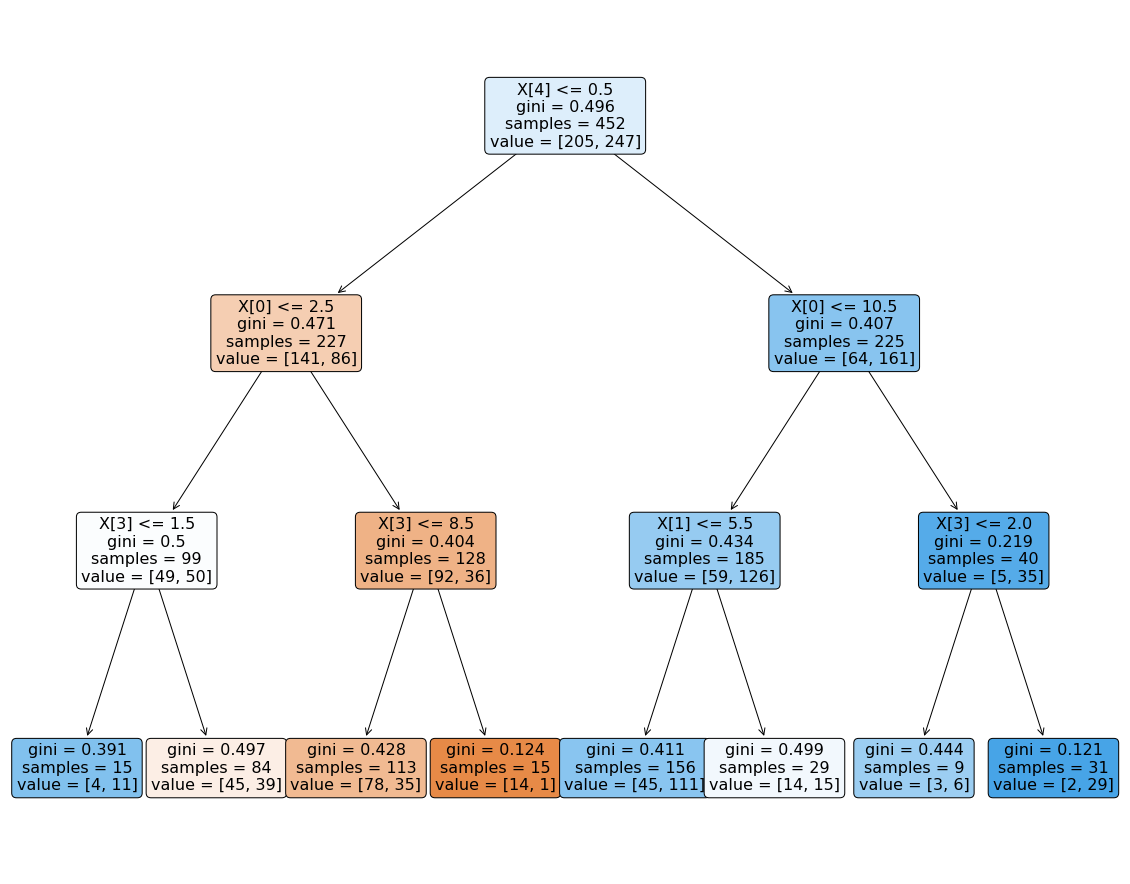

In [73]:
plt.figure(figsize = (20,16))
tree.plot_tree(clf, fontsize = 16,rounded = True , filled = True);

In [74]:
predTree = clf.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
report = classification_report(predTree, Y_test)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.70      0.63        43
           1       0.79      0.69      0.74        71

    accuracy                           0.69       114
   macro avg       0.68      0.69      0.68       114
weighted avg       0.71      0.69      0.70       114



In [82]:
def plot_confusion_matrix(y,y_predict):
    "To plot confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['1 ', '0']); ax.yaxis.set_ticklabels(['1', '0'])

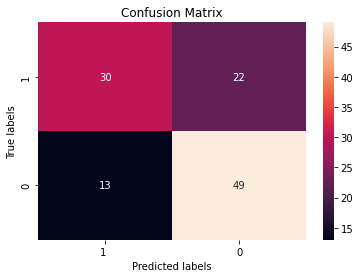

In [83]:
plot_confusion_matrix(Y_test, predTree)

In [85]:
print("Accuracy:", accuracy_score(Y_test, predTree))

Accuracy: 0.6929824561403509
